In [ ]:
# Do not change the path of this notebook (do not use %cd)
# This is the updates version

# Prepare Enviroment

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
PATH_STORE_RESULTS = "/content/drive/MyDrive/MLDL_PROJECT/results/"

Mounted at /content/drive


In [ ]:
!pip install torchmetrics fvcore



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.5/961.5 kB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 69.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!git clone https://github.com/MateusWiteck/domain_adaptation_semantic_segmentation.git


Cloning into 'domain_adaptation_semantic_segmentation'...
remote: Enumerating objects: 104, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 104 (delta 18), reused 16 (delta 8), pack-reused 67 (from 2)
Receiving objects: 100% (104/104), 1.34 MiB | 3.50 MiB/s, done.
Resolving deltas: 100% (41/41), done.


In [ ]:
%run domain_adaptation_semantic_segmentation/train.py

In [ ]:
# Download Citiescapes Dataset:
#!pip install -q gdown
#!gdown --id 1Qb4UrNsjvlU-wEsR9d7rckB0YS_LXgb2 --output Cityscapes.zip

# Copy from the drive
!cp /content/drive/MyDrive/MLDL_PROJECT/Cityscapes.zip /content/
!mkdir -p /content/domain_adaptation_semantic_segmentation/data

# Unzip
!unzip -q /content/Cityscapes.zip -d /content/domain_adaptation_semantic_segmentation/data/


In [ ]:
# Download GTA Dataset:
#!pip install -q gdown
#!gdown --id 1xYxlcMR2WFCpayNrW2-Rb7N-950vvl23 --output GTA5.zip

# Copy from Drive
!cp /content/drive/MyDrive/MLDL_PROJECT/GTA5.zip /content/
!mkdir -p /content/domain_adaptation_semantic_segmentation/data

# Unzip
!unzip -q /content/GTA5.zip -d /content/domain_adaptation_semantic_segmentation/data/


# Dataset and Dataloader

Here we should:
- Convert the GTA5 labels to the same format of the Cityscapes dataset (https://github.com/sarrrrry/PyTorchDL_GTA5/blob/master/pytorchdl_gta5/labels.py)
- Create the Datasets class for each one
- Create the DataLoader
- Define the train test division for the GTA dataset (Cityscapes is already defined)

## Cityscapes

/content/domain_adaptation_semantic_segmentation


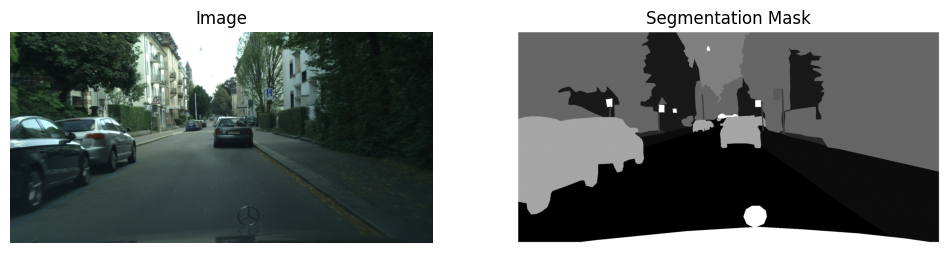

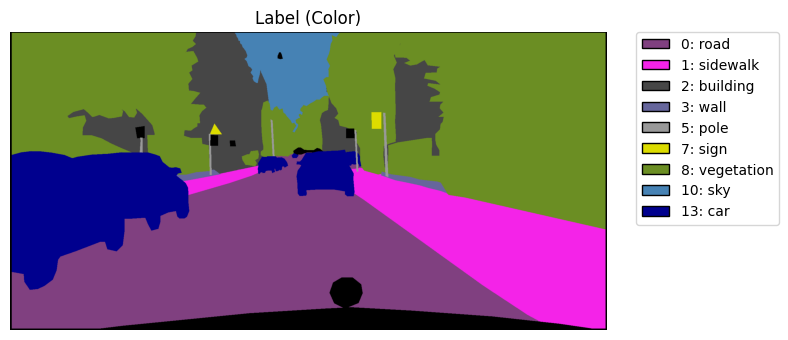

Dataset length: 1572
Image shape: torch.Size([3, 1024, 2048])
Label shape: torch.Size([1024, 2048])


<Figure size 640x480 with 0 Axes>

In [ ]:
%cd /content/domain_adaptation_semantic_segmentation/
%run datasets/cityscapes.py

## GTA5


In [ ]:
#%run datasets/gta5.py

# Task 2


## A) Classic semantic segmentation network.
For this step, you have to train a classic segmentation network (DeepLabV2 [2]) on the Cityscapes dataset.
- Dataset: Cityscapes [5]
- Training epochs: 50
- Training resolution (Cityscapes): 1024x512
- Test resolution (Cityscapes): 1024x512
- Backbone: R101 (pre-trained on ImageNet) [2]
- Semantic classes: 19
- Metrics: Mean Intersection over Union (mIoU) [read this to understand the metrics], latency, FLOPs, number of parameters.

In [ ]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'


In [ ]:

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms

# Set seed for reproducibility
torch.manual_seed(335079)

if torch.cuda.is_available():
    torch.device('cuda')
else:
    raise Exception('No GPU available')

# Clean the enviroment
torch.cuda.empty_cache()
torch.cuda.ipc_collect()


# ---------- Start TASK 2A ---------------------------

from datasets.cityscapes import CityScapes
from models.deeplabv2.deeplabv2 import get_deeplab_v2
from models.bisenet.build_bisenet import BiSeNet


# === Hyperparameters ===
num_classes_cs = 19
batch_size_cs = 8
num_workers_cs = 2
learning_rate_cs = 2.5e-4
num_epochs_cs = 50
resolution_cs = (512,1024) #(512, 1024)

# === Model ===
# Load pretrained weights from PATH_STORE_RESULTS
model_cs = get_deeplab_v2(num_classes=num_classes_cs, pretrain=True, pretrain_model_path='/content/drive/MyDrive/MLDL_PROJECT/deeplab_resnet_pretrained_imagenet.pth')
model_cs = model_cs.to('cuda')


# === Loss & Optimizer ===
criterion_cs = nn.CrossEntropyLoss(ignore_index=255)
optimizer_cs = optim.SGD(
    model_cs.parameters(),
    lr=learning_rate_cs,
    momentum=0.9,
    weight_decay=0.0005
)

# === Dataset & Dataloader ===
transform_cs = transforms.Compose([
    # Training resolution (Cityscapes): 1024x512
    transforms.Resize(resolution_cs, interpolation=transforms.InterpolationMode.NEAREST),  # TODO: explain what method the resize uses in the report.
    transforms.ToTensor(),
    transforms.Normalize(mean=[.485, .456, .406], std=[.229, .224, .225])
])

# Train datasets and dataloader
dataset_cs = CityScapes(
    root_dir='data/Cityscapes/Cityspaces',
    split='train',
    transform=transform_cs,
    label_transform=transforms.Resize(resolution_cs, interpolation=transforms.InterpolationMode.NEAREST) # Should be transformed as the image
)
dataloader_cs = DataLoader(
    dataset_cs,
    batch_size=batch_size_cs,
    shuffle=True,
    num_workers=num_workers_cs,
    pin_memory=True
)

# Validation dataset and dataloader
val_dataset_cs = CityScapes(
    root_dir='data/Cityscapes/Cityspaces',
    split='val',
    transform=transform_cs,
    label_transform=transforms.Resize(resolution_cs, interpolation=transforms.InterpolationMode.NEAREST) # Should be transformed as the image
)
val_dataloader_cs = DataLoader(
    val_dataset_cs,
    batch_size=batch_size_cs,
    shuffle=False,
    num_workers=num_workers_cs,
    pin_memory=True
)


Deeplab pretraining loading...


In [ ]:
# Training
%run train.py
#65640309ee9230280363e88fc42d30ff392b9126

# Train Model
metrics_train_task2a = train_model(
    model_cs,
    dataloader_cs,
    val_dataloader_cs,
    optimizer_cs,
    criterion_cs,
    num_classes_cs,
    num_epochs_cs,
    "Task2a"
)


# === Save the model ===
torch.save(model_cs.state_dict(), PATH_STORE_RESULTS + 'final_models/task2a.pth')

Loading checkpoint from /content/drive/MyDrive/MLDL_PROJECT/results/checkpoints/Task2a.pt


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: alessandro-gentile26 (mldl_project_2025) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch [31/50]


Epoch [32/50]


Epoch [33/50]


Epoch [34/50]


Epoch [35/50]


Epoch [36/50]


Epoch [37/50]


Epoch [38/50]


Epoch [39/50]


Epoch [40/50]


Checkpoint saved to /content/drive/MyDrive/MLDL_PROJECT/results/checkpoints/Task2a.pt
Epoch [41/50]


Epoch [42/50]


Epoch [43/50]


Epoch [44/50]


Epoch [45/50]


Epoch [46/50]


Epoch [47/50]


Epoch [48/50]


Epoch [49/50]


Epoch [50/50]


Checkpoint saved to /content/drive/MyDrive/MLDL_PROJECT/results/checkpoints/Task2a.pt


train_latency_per_batch,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_loss,█▇▇▇▆▆▅▅▅▄▄▃▃▃▂▂▂▂▁▁
train_mIoU,▁▂▂▂▃▃▃▄▄▅▅▆▆▆▇▇▇▇██
val_loss,▇██▆▆▆▄▅▅▄▃▂▃▂▃▂▂▁▁▁
val_mIoU,▁▂▁▄▄▃▅▄▅▅▅▆▆▇▆▇█▇█▇
train_latency_per_batch,0.56703
train_loss,0.16057
train_mIoU,0.71447
val_loss,0.2807
val_mIoU,0.56238


In [ ]:
# Testing Performace
%run train.py
# 65640309ee9230280363e88fc42d30ff392b9126

performance_dataloader_cs = DataLoader(
    val_dataset_cs,
    batch_size=1,
    shuffle=False,
    num_workers=num_workers_cs,
    pin_memory=True
)

model_cs = get_deeplab_v2(num_classes=19, pretrain=False)
model_cs.load_state_dict(torch.load(PATH_STORE_RESULTS + 'final_models/task2a.pth'))

results = evaluate_performance(model_cs, performance_dataloader_cs, num_classes=19, device='cuda')

# Impressão formatada dos resultados
for k, v in results.items():
    print(f"{k}: {v:.4f}" if isinstance(v, float) else f"{k}: {v}")



val_loss: 0.2841
val_mIoU: 0.5624
latency_per_image: 0.2552
FLOPs (GFLOPs): 374.6647
parameters (M): 43.7957


## B) Real-time semantic segmentation network.
For this step, you have to train a real-time segmentation network (BiSeNet [3]) on the Cityscapes dataset.
Dataset: Cityscapes [5]
- Training epochs: 50
- Training resolution (Cityscapes): 1024x512
- Test resolution (Cityscapes): 1024x512
- Backbone: ResNet18 (pre-trained on ImageNet) [3]
- Semantic classes: 19
- Metrics: mIoU, latency, FLOPs, number of parameters.

In [ ]:

%run train.py
#65640309ee9230280363e88fc42d30ff392b9126

# Load BISENET
bisenet_model_cs = BiSeNet(num_classes=num_classes_cs, context_path="resnet18").to('cuda')

#
criterion_cs = nn.CrossEntropyLoss(ignore_index=255)
bisenet_optimizer_cs = optim.SGD(
    bisenet_model_cs.parameters(),
    lr=learning_rate_cs,
    momentum=0.9,
    weight_decay=0.0005
)


# Train Model
metrics_train_task2b = train_model(
    bisenet_model_cs,
    dataloader_cs,
    val_dataloader_cs,
    bisenet_optimizer_cs,
    criterion_cs,
    num_classes_cs,
    num_epochs_cs,
    "Task2b"
)


# === Save the model ===
torch.save(model_cs.state_dict(), PATH_STORE_RESULTS + 'final_models/task2b.pth')

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 173MB/s]
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth
100%|██████████| 171M/171M [00:01<00:00, 175MB/s]


Loading checkpoint from /content/drive/MyDrive/MLDL_PROJECT/results/checkpoints/Task2b.pt


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: alessandro-gentile26 (mldl_project_2025) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch [11/50]


Epoch [12/50]


Epoch [13/50]


Epoch [14/50]


Epoch [15/50]


Epoch [16/50]


Epoch [17/50]


Epoch [18/50]


Epoch [19/50]


Epoch [20/50]


Checkpoint saved to /content/drive/MyDrive/MLDL_PROJECT/results/checkpoints/Task2b.pt
Epoch [21/50]


Epoch [22/50]


Epoch [23/50]


Epoch [24/50]


Epoch [25/50]


Epoch [26/50]


Epoch [27/50]


Epoch [28/50]


Epoch [29/50]


Epoch [30/50]


Checkpoint saved to /content/drive/MyDrive/MLDL_PROJECT/results/checkpoints/Task2b.pt
Epoch [31/50]


Epoch [32/50]


Epoch [33/50]


Epoch [34/50]


Epoch [35/50]


Epoch [36/50]


Epoch [37/50]


Epoch [38/50]


Epoch [39/50]


Epoch [40/50]


Checkpoint saved to /content/drive/MyDrive/MLDL_PROJECT/results/checkpoints/Task2b.pt
Epoch [41/50]


Epoch [42/50]


Epoch [43/50]


Epoch [44/50]


Epoch [45/50]


Epoch [46/50]


Epoch [47/50]


Epoch [48/50]


Epoch [49/50]


Epoch [50/50]


Checkpoint saved to /content/drive/MyDrive/MLDL_PROJECT/results/checkpoints/Task2b.pt


train_latency_per_batch,█▆▄▄▄▃▂▃▃▂▅▂▄▄▃▃▂▂▂▂▂▂▁▂▁▂▂▂▂▂▃▂▃▃▃▂▁▁▃▂
train_loss,█▇▇▇▆▆▆▅▅▅▅▅▄▄▄▄▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁
train_mIoU,▁▁▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▆▇▇▇▇▇▇▇████
val_loss,██▇▇▆▆▆▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁
val_mIoU,▁▂▂▂▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇██████
train_latency_per_batch,0.81838
train_loss,0.27911
train_mIoU,0.51326
val_loss,0.37388
val_mIoU,0.40842


RuntimeError: Parent directory /content/drive/MyDrive/MLDL_PROJECT/results/final_models does not exist.

In [ ]:
torch.save(bisenet_model_cs.state_dict(), PATH_STORE_RESULTS + 'final_models/task2b.pth')
!git pull
!git fetch --all
!ls

Already up to date.
Fetching origin
data							   models     train.py
datasets						   notes.md   utils.py
Domain_Adaptation_in_Semantic_Segmentation_Notebook.ipynb  README.md  wandb


In [ ]:
# Testing Performace
%run train.py
# 65640309ee9230280363e88fc42d30ff392b9126

performance_dataloader_cs = DataLoader(
    val_dataset_cs,
    batch_size=1,
    shuffle=False,
    num_workers=num_workers_cs,
    pin_memory=True
)

# Re-create the model architecture (same as when saving)
bisenet_model_cs = BiSeNet(num_classes=num_classes_cs, context_path="resnet18").to('cuda')

# Load the saved weights
bisenet_model_cs.load_state_dict(torch.load(PATH_STORE_RESULTS + 'final_models/task2b.pth'))

results = evaluate_performance(bisenet_model_cs, performance_dataloader_cs, num_classes=19, device='cuda')

# Impressão formatada dos resultados
for k, v in results.items():
    print(f"{k}: {v:.4f}" if isinstance(v, float) else f"{k}: {v}")



context_path.features.avgpool, context_path.features.fc, supervision1, supervision2


val_loss: 4.3183
val_mIoU: 0.0128
latency_per_image: 0.0242
FLOPs (GFLOPs): 25.7798
parameters (M): 12.5817


# Task 3: DOMAIN SHIFT
From now on, we will employ BiSeNet as our segmentation to ease the resource requirements of the next experiments.
Consider as upper bound the results obtained in Table 2, i.e. the segmentation networks trained on the labeled target images (Cityscapes).


## A) Evaluating the domain shift problem in Semantic Segmentation
In semantic segmentation collecting manually annotated images is expensive. A popular solution consists in adopting synthetic datasets (i.e. artificial images generated in a simulation environment).

Specifically, in this step we employ the synthetic images from GTA5 [5] (source domain) to train our real-time segmentation network, which is then evaluated on the real images from Cityscapes [5] (target domain).

- Dataset: GTA5 [5]

- Training Set:  GTA5

- Validation Set: Cityscapes [5] validation split

- Training epochs: 50

- Training resolution (GTA5): 1280x720

- Test resolution (Cityscapes): 1024x512

- Backbone: ResNet18 (pre-trained on ImageNet) [2]

- Semantic Classes: 19

- Metrics: mIoU

## B) Data augmentations to reduce the domain shift
A naive solution to improve the generalization capability of the segmentation network trained on the synthetic domain consists in the usage of data augmentations during training. Through them, we i) virtually expand the dataset size and ii) modify the visual appearance of source (synthetic) images in order to make them more similar to the target (real) ones.
Specifically, we repeat the previous experiment, introducing data augmentations at training time (e.g. horizontal flip, Gaussian Blur, Multiply, ecc.). The decision of what kind of algorithm is left to the student. Set the probability to perform augmentation to 0.5.